In [1]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
div.container{width:80% !important;}
div.prompt {min-width:70px;}
div#toc-header{margin-top:150px;}
span.toc-item-num{display:none;}
div.CodeMirror {font-family:Consolas}
div.input {font-family:Consolas}
</style>
"""))

In [50]:
import numpy as np
import pandas as pd
import sys
from tensorflow.keras import utils  # utils.to_categorical
from tensorflow.keras.models import Sequential    # 모델 생성
from tensorflow.keras.layers import Dense, Input  # 모델에 layer 쌓기
import matplotlib.pyplot as plt

# 로지스틱회귀분석(이진분류)
## 1. 데이터셋 생성 & 전처리

In [51]:
df = pd.read_csv('data/pima-indians-diabetes.csv', comment='#', header=None)
df.info(), df.values[:2]
# 결측치가 없으므로, csv 파일을 바로 넘파이 배열로 읽어들일 예정

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(None,
 array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
          50.   ,   1.   ],
        [  1.   ,  85.   ,  66.   ,  29.   ,   0.   ,  26.6  ,   0.351,
          31.   ,   0.   ]]))

In [52]:
# np.set_printoptions(threshold=sys.maxsize)

In [53]:
# 1. 임신횟수
# 2. 2시간내 포도당 농도
# 3. 혈압
# 4. 피부접힘 두께
# 5. 인슐린수치
# 6. BMI체질량지수
# 7. 가족력
# 8. 나이
# 9. 당뇨병발병여부

In [54]:
# csv파일을 numpy배열로 읽어오기 np.loadtxt(), np.genfromtxt()  '#'이 있는 행은 제외하여 읽어옴
dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',',  # ','를 기준으로 분리
                     )
dataset.shape

(768, 9)

In [55]:
# 학습데이터셋(학습용 데이터:train dataset) : 모델 학습 시 사용
X_train = dataset[:700, :-1]  # 독립변수
y_train = dataset[:700,  -1]  # 종속변수
# 테스트데이터셋(시험용 데이터:test dataset) : 모델 평가 시 사용
X_test = dataset[700:, :-1]
y_test = dataset[700:,  -1]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 8), (700,), (68, 8), (68,))

## 2. 모델 구성

In [56]:
model = Sequential()
model.add(Input(shape=(8, )))                    # 독립변수 8개 : 입력, 종속변수 1개 : 출력 
model.add(Dense(units=12, activation='relu'))    # hidden layer  # units : 출력갯수
model.add(Dense(units=8, activation='relu'))     # hidden layer  # units : 출력갯수
model.add(Dense(units=1,  activation='sigmoid')) # 최종 출력층
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 12)                108       
                                                                 
 dense_20 (Dense)            (None, 8)                 104       
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


## 3. 학습과정 설정

In [57]:
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

## 4. 학습

In [58]:
hist = model.fit(X_train, y_train,  # 훈련(학습)데이터
                 epochs=200,        # 300번 학습
                 # batch_size=350,  # 350개씩 나눠서
                 # validation_split=0.2,  # 검증데이터 비율(훈련데이터셋 중 20%를 검증용 데이터로)
                 verbose=2
                )

Epoch 1/200
22/22 - 0s - loss: 12.3233 - binary_accuracy: 0.4571 - 466ms/epoch - 21ms/step
Epoch 2/200
22/22 - 0s - loss: 4.8239 - binary_accuracy: 0.6014 - 75ms/epoch - 3ms/step
Epoch 3/200
22/22 - 0s - loss: 2.2784 - binary_accuracy: 0.6286 - 83ms/epoch - 4ms/step
Epoch 4/200
22/22 - 0s - loss: 1.2577 - binary_accuracy: 0.6100 - 101ms/epoch - 5ms/step
Epoch 5/200
22/22 - 0s - loss: 1.1112 - binary_accuracy: 0.6200 - 82ms/epoch - 4ms/step
Epoch 6/200
22/22 - 0s - loss: 0.9812 - binary_accuracy: 0.6543 - 103ms/epoch - 5ms/step
Epoch 7/200
22/22 - 0s - loss: 0.9257 - binary_accuracy: 0.6557 - 97ms/epoch - 4ms/step
Epoch 8/200
22/22 - 0s - loss: 0.8572 - binary_accuracy: 0.6571 - 100ms/epoch - 5ms/step
Epoch 9/200
22/22 - 0s - loss: 0.8023 - binary_accuracy: 0.6614 - 102ms/epoch - 5ms/step
Epoch 10/200
22/22 - 0s - loss: 0.7950 - binary_accuracy: 0.6543 - 81ms/epoch - 4ms/step
Epoch 11/200
22/22 - 0s - loss: 0.7367 - binary_accuracy: 0.6743 - 100ms/epoch - 5ms/step
Epoch 12/200
22/22 - 0

22/22 - 0s - loss: 0.5189 - binary_accuracy: 0.7543 - 83ms/epoch - 4ms/step
Epoch 94/200
22/22 - 0s - loss: 0.5347 - binary_accuracy: 0.7314 - 83ms/epoch - 4ms/step
Epoch 95/200
22/22 - 0s - loss: 0.5357 - binary_accuracy: 0.7543 - 67ms/epoch - 3ms/step
Epoch 96/200
22/22 - 0s - loss: 0.5263 - binary_accuracy: 0.7486 - 91ms/epoch - 4ms/step
Epoch 97/200
22/22 - 0s - loss: 0.5198 - binary_accuracy: 0.7443 - 67ms/epoch - 3ms/step
Epoch 98/200
22/22 - 0s - loss: 0.5363 - binary_accuracy: 0.7429 - 83ms/epoch - 4ms/step
Epoch 99/200
22/22 - 0s - loss: 0.5173 - binary_accuracy: 0.7514 - 83ms/epoch - 4ms/step
Epoch 100/200
22/22 - 0s - loss: 0.5305 - binary_accuracy: 0.7300 - 83ms/epoch - 4ms/step
Epoch 101/200
22/22 - 0s - loss: 0.5183 - binary_accuracy: 0.7600 - 83ms/epoch - 4ms/step
Epoch 102/200
22/22 - 0s - loss: 0.5182 - binary_accuracy: 0.7543 - 84ms/epoch - 4ms/step
Epoch 103/200
22/22 - 0s - loss: 0.5355 - binary_accuracy: 0.7486 - 83ms/epoch - 4ms/step
Epoch 104/200
22/22 - 0s - los

Epoch 185/200
22/22 - 0s - loss: 0.4840 - binary_accuracy: 0.7586 - 83ms/epoch - 4ms/step
Epoch 186/200
22/22 - 0s - loss: 0.4921 - binary_accuracy: 0.7671 - 83ms/epoch - 4ms/step
Epoch 187/200
22/22 - 0s - loss: 0.4891 - binary_accuracy: 0.7629 - 99ms/epoch - 4ms/step
Epoch 188/200
22/22 - 0s - loss: 0.4935 - binary_accuracy: 0.7557 - 83ms/epoch - 4ms/step
Epoch 189/200
22/22 - 0s - loss: 0.4882 - binary_accuracy: 0.7829 - 98ms/epoch - 4ms/step
Epoch 190/200
22/22 - 0s - loss: 0.4851 - binary_accuracy: 0.7686 - 68ms/epoch - 3ms/step
Epoch 191/200
22/22 - 0s - loss: 0.4919 - binary_accuracy: 0.7529 - 78ms/epoch - 4ms/step
Epoch 192/200
22/22 - 0s - loss: 0.5001 - binary_accuracy: 0.7714 - 78ms/epoch - 4ms/step
Epoch 193/200
22/22 - 0s - loss: 0.4792 - binary_accuracy: 0.7671 - 77ms/epoch - 4ms/step
Epoch 194/200
22/22 - 0s - loss: 0.4791 - binary_accuracy: 0.7671 - 78ms/epoch - 4ms/step
Epoch 195/200
22/22 - 0s - loss: 0.4865 - binary_accuracy: 0.7686 - 67ms/epoch - 3ms/step
Epoch 196/

## 5. 모델 평가하기(학습과정 보기 및 평가)

In [59]:
hist.history.keys()

dict_keys(['loss', 'binary_accuracy'])

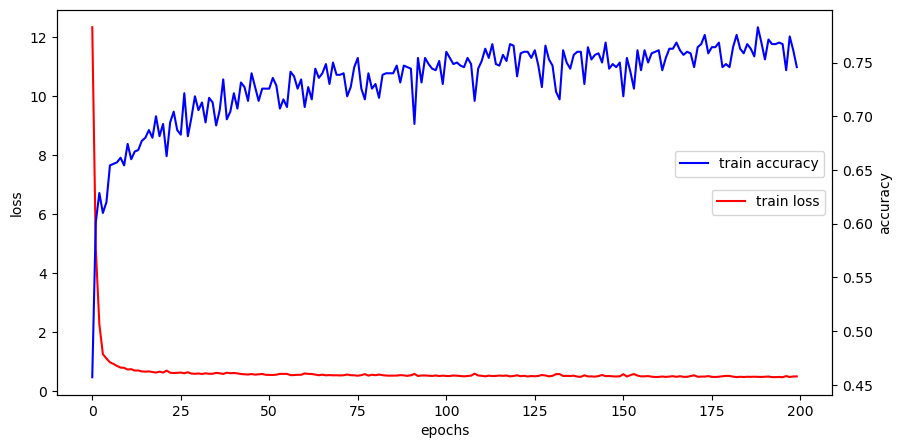

In [60]:
# 학습과정 보기(validation dataset 없는 경우)
fig, loss_ax = plt.subplots(figsize=(10, 5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['binary_accuracy'], 'b', label='train accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.65))
plt.show()

In [61]:
# 모델 평가하기(X)
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 3ms/step - loss: 0.4680 - binary_accuracy: 0.7671


[0.46804285049438477, 0.7671428322792053]

In [62]:
# 모델 평가하기(O)
score = model.evaluate(X_test, y_test)
print('loss : {}, accuracy : {}%'.format(score[0], score[1]*100))

3/3 [==============================] - 0s 4ms/step - loss: 0.5846 - binary_accuracy: 0.7353
loss : 0.5846109390258789, accuracy : 73.52941036224365%


## 6. 모델 사용하기

In [63]:
X_train[0], y_train[10]

(array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ]),
 0.0)

In [64]:
model.predict([[6, 148, 72, 35, 0, 33.6, 0.6, 50]])

1/1 [==============================] - 0s 52ms/step


array([[0.60932773]], dtype=float32)

In [65]:
model.predict([[6, 148, 72, 35, 0, 33.6, 0.6, 50]]) >= 0.5

1/1 [==============================] - 0s 31ms/step


array([[ True]])

In [66]:
(model.predict([[6, 148, 72, 35, 0, 33.6, 0.6, 50],
               [6, 148, 72, 35, 0, 33.6, 0.6, 45]]) >= 0.5).astype(int)

1/1 [==============================] - 0s 46ms/step


array([[1],
       [1]])

In [67]:
model.predict([[6, 148, 72, 35, 0, 33.6, 0.6, 50]]).round()

1/1 [==============================] - 0s 31ms/step


array([[1.]], dtype=float32)

## 7. 교차표
 - 테스트 데이터셋의 실제값(y_test)과 예측값

In [68]:
y_test

array([0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.])

In [69]:
y_hat = (model.predict(X_test) >= 0.5).astype(float)  # X_test : 2차원 배열
cnt1 = 0
cnt2 = 0
cnt3 = 0
cnt4 = 0
# y_hat.shape : 2차원, y_test.shape : 1차원
y_hat.reshape(-1)   # 1차원으로
y_test.reshape(-1)  # 1차원으로
for h, y in zip(y_hat.reshape(-1), y_test.reshape(-1)):
    # print(h, y)
    if h == 1.0 and y == 1.0:
        cnt1 += 1
    elif y == 1.0 and h == 0.0:
        cnt2 += 1
    elif y == 0.0 and h == 1.0:
        cnt3 += 1
    else:
        cnt4 += 1
print(cnt1, cnt2)
print(cnt3, cnt4)

3/3 [==============================] - 0s 0s/step
13 14
4 37


In [70]:
# 교차표를 만드는 함수
#                  ┌ 1차원 실제값
ctab = pd.crosstab(y_test, y_hat.reshape(-1))
#                          └ 2차원->1차원 예측값
ctab.index.name = '실제값'
ctab.columns.name = '예측값'
ctab

예측값,0.0,1.0
실제값,,
0.0,37,4
1.0,14,13


# 분류분석
```
1. 데이터셋 생성 및 전처리 : 훈련셋600, 검증셋100, 테스트셋68으로 분리, 종속변수의 원핫인코딩
2. 모델생성(input 8, target 2) : 출력층에서의 활성화함수 'softmax'
3. 모델학습과정 설정 (loss ='categorical_crossentropy' metrics=['accuracy']
4. 학습 : validation_data=[X_val, y_val] 추가해서 학습
5. 학습평가 : 그래프(hist.history.kes()를 확인후 4가지)
               평가(X_test, Y_test)
               교차표(pd.crosstab 이용
6. 모델 사용하기 - 예측
            0        1
         0.9912   0.001234
````

In [71]:
import numpy as np
import pandas as pd
import sys
from tensorflow.keras import utils  # utils.to_categorical
from tensorflow.keras.models import Sequential    # 모델 생성
from tensorflow.keras.layers import Dense, Input  # 모델에 layer 쌓기
import matplotlib.pyplot as plt

In [73]:
dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',')

## 1. 데이터셋 생성 및 전처리 : 훈련셋600, 검증셋100, 테스트셋68으로 분리, 종속변수의 원핫인코딩

In [90]:
X_train = dataset[:600, :-1]
y_train = dataset[:600, -1]
X_val = dataset[600:700, :-1]
y_val = dataset[600:700, -1]
X_test = dataset[:700, :-1]
y_test = dataset[:700, -1]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((600, 8), (600,), (100, 8), (100,), (700, 8), (700,))

In [93]:
# 원핫인코딩
Y_train = utils.to_categorical(y_train, 2)
Y_val = utils.to_categorical(y_val, 2)
Y_test = utils.to_categorical(y_test, 2)
Y_train.shape, Y_val.shape, Y_test.shape

((600, 2), (100, 2), (700, 2))

## 2. 모델생성(input 8, target 2) : 출력층에서의 활성화함수 'softmax'

In [94]:
model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=2, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 20)                180       
                                                                 
 dense_32 (Dense)            (None, 10)                210       
                                                                 
 dense_33 (Dense)            (None, 2)                 22        
                                                                 
Total params: 412
Trainable params: 412
Non-trainable params: 0
_________________________________________________________________


## 3. 모델학습과정 설정 (loss ='categorical_crossentropy' metrics=['accuracy']

In [95]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 4. 학습 : validation_data=[X_val, y_val] 추가해서 학습

In [96]:
hist = model.fit(X_train, Y_train, 
                 epochs=200,        
                 validation_data=[X_val, Y_val],
                 verbose=1
                )

Epoch 1/200
19/19 [==============================] - 1s 13ms/step - loss: 19.4305 - accuracy: 0.6533 - val_loss: 11.7879 - val_accuracy: 0.6700
Epoch 2/200
19/19 [==============================] - 0s 5ms/step - loss: 8.0147 - accuracy: 0.6517 - val_loss: 2.3345 - val_accuracy: 0.6700
Epoch 3/200
19/19 [==============================] - 0s 5ms/step - loss: 2.5518 - accuracy: 0.4817 - val_loss: 1.5000 - val_accuracy: 0.7100
Epoch 4/200
19/19 [==============================] - 0s 6ms/step - loss: 1.7533 - accuracy: 0.5800 - val_loss: 1.2498 - val_accuracy: 0.6800
Epoch 5/200
19/19 [==============================] - 0s 6ms/step - loss: 1.3625 - accuracy: 0.5983 - val_loss: 1.0117 - val_accuracy: 0.6600
Epoch 6/200
19/19 [==============================] - 0s 5ms/step - loss: 1.1412 - accuracy: 0.6067 - val_loss: 0.8203 - val_accuracy: 0.7000
Epoch 7/200
19/19 [==============================] - 0s 5ms/step - loss: 0.9939 - accuracy: 0.6067 - val_loss: 0.7003 - val_accuracy: 0.7200
Epoch 8/20

Epoch 59/200
19/19 [==============================] - 0s 6ms/step - loss: 0.5511 - accuracy: 0.7317 - val_loss: 0.5597 - val_accuracy: 0.6700
Epoch 60/200
19/19 [==============================] - 0s 6ms/step - loss: 0.5412 - accuracy: 0.7267 - val_loss: 0.5546 - val_accuracy: 0.6600
Epoch 61/200
19/19 [==============================] - 0s 5ms/step - loss: 0.5642 - accuracy: 0.7200 - val_loss: 0.6149 - val_accuracy: 0.7200
Epoch 62/200
19/19 [==============================] - 0s 4ms/step - loss: 0.6145 - accuracy: 0.7100 - val_loss: 0.7571 - val_accuracy: 0.7200
Epoch 63/200
19/19 [==============================] - 0s 5ms/step - loss: 0.5947 - accuracy: 0.7050 - val_loss: 0.5618 - val_accuracy: 0.6400
Epoch 64/200
19/19 [==============================] - 0s 5ms/step - loss: 0.5400 - accuracy: 0.7317 - val_loss: 0.5662 - val_accuracy: 0.6900
Epoch 65/200
19/19 [==============================] - 0s 4ms/step - loss: 0.5762 - accuracy: 0.7067 - val_loss: 0.6274 - val_accuracy: 0.7200
Epoch 

19/19 [==============================] - 0s 6ms/step - loss: 0.4971 - accuracy: 0.7500 - val_loss: 0.5354 - val_accuracy: 0.6900
Epoch 117/200
19/19 [==============================] - 0s 5ms/step - loss: 0.4996 - accuracy: 0.7333 - val_loss: 0.5486 - val_accuracy: 0.6600
Epoch 118/200
19/19 [==============================] - 0s 5ms/step - loss: 0.5032 - accuracy: 0.7500 - val_loss: 0.5462 - val_accuracy: 0.7100
Epoch 119/200
19/19 [==============================] - 0s 5ms/step - loss: 0.5275 - accuracy: 0.7467 - val_loss: 0.5938 - val_accuracy: 0.6700
Epoch 120/200
19/19 [==============================] - 0s 5ms/step - loss: 0.5599 - accuracy: 0.7350 - val_loss: 0.5597 - val_accuracy: 0.6800
Epoch 121/200
19/19 [==============================] - 0s 5ms/step - loss: 0.5071 - accuracy: 0.7567 - val_loss: 0.6000 - val_accuracy: 0.7100
Epoch 122/200
19/19 [==============================] - 0s 6ms/step - loss: 0.5226 - accuracy: 0.7417 - val_loss: 0.5426 - val_accuracy: 0.7000
Epoch 123/200

19/19 [==============================] - 0s 6ms/step - loss: 0.4917 - accuracy: 0.7533 - val_loss: 0.5315 - val_accuracy: 0.7200
Epoch 174/200
19/19 [==============================] - 0s 4ms/step - loss: 0.4822 - accuracy: 0.7667 - val_loss: 0.5232 - val_accuracy: 0.7200
Epoch 175/200
19/19 [==============================] - 0s 5ms/step - loss: 0.4851 - accuracy: 0.7550 - val_loss: 0.5425 - val_accuracy: 0.7100
Epoch 176/200
19/19 [==============================] - 0s 5ms/step - loss: 0.4951 - accuracy: 0.7567 - val_loss: 0.5195 - val_accuracy: 0.7100
Epoch 177/200
19/19 [==============================] - 0s 4ms/step - loss: 0.4768 - accuracy: 0.7750 - val_loss: 0.5211 - val_accuracy: 0.7100
Epoch 178/200
19/19 [==============================] - 0s 5ms/step - loss: 0.4821 - accuracy: 0.7667 - val_loss: 0.5085 - val_accuracy: 0.7300
Epoch 179/200
19/19 [==============================] - 0s 6ms/step - loss: 0.5021 - accuracy: 0.7467 - val_loss: 0.5477 - val_accuracy: 0.7000
Epoch 180/200

## 5. 학습평가 : 그래프(hist.history.kes()를 확인후 4가지) 평가(X_test, Y_test) 교차표(pd.crosstab) 이용